In [ ]:
!pip install --upgrade pip
! pip install tensorflow
! pip install --upgrade keras-cv
! pip install --upgrade keras-hub
! pip install --upgrade keras
! pip install keras-visualizer
! pip install keras-visualizer --upgrade
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.1/691.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
     

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, models
from keras import models, layers
from keras_visualizer import visualizer
from keras.utils import plot_model
import streamlit as st

In [6]:
#Para agarrar el dataset que esta subido a drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Directorio base del dataset
dataset_dir = '/content/sample_data/fruits'  # Cambia según la ruta real en tu Drive

# Crear dataset de entrenamiento
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',
    image_size=(150, 150),
    batch_size=32,
    validation_split=0.2,  # 20% para validación
    subset='training',
    seed=123
)

# Crear dataset de validación
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',
    image_size=(150, 150),
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=123
)

# Mostrar las clases disponibles
class_names = train_dataset.class_names
print(f"Clases: {class_names}")

Found 360 files belonging to 9 classes.
Using 288 files for training.
Found 360 files belonging to 9 classes.
Using 72 files for validation.
Clases: ['apple', 'banana', 'cherry', 'chickoo', 'grapes', 'kiwi', 'mango', 'orange', 'strawberry']


In [8]:
# Normalización de las imágenes
normalization_layer = layers.Rescaling(1./255)

# Aplicar normalización
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

# Prefetch para mejorar el rendimiento
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [11]:
# Definir la arquitectura de la red neuronal
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,513 (18.42 MB)

 Trainable params: 4,829,513 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

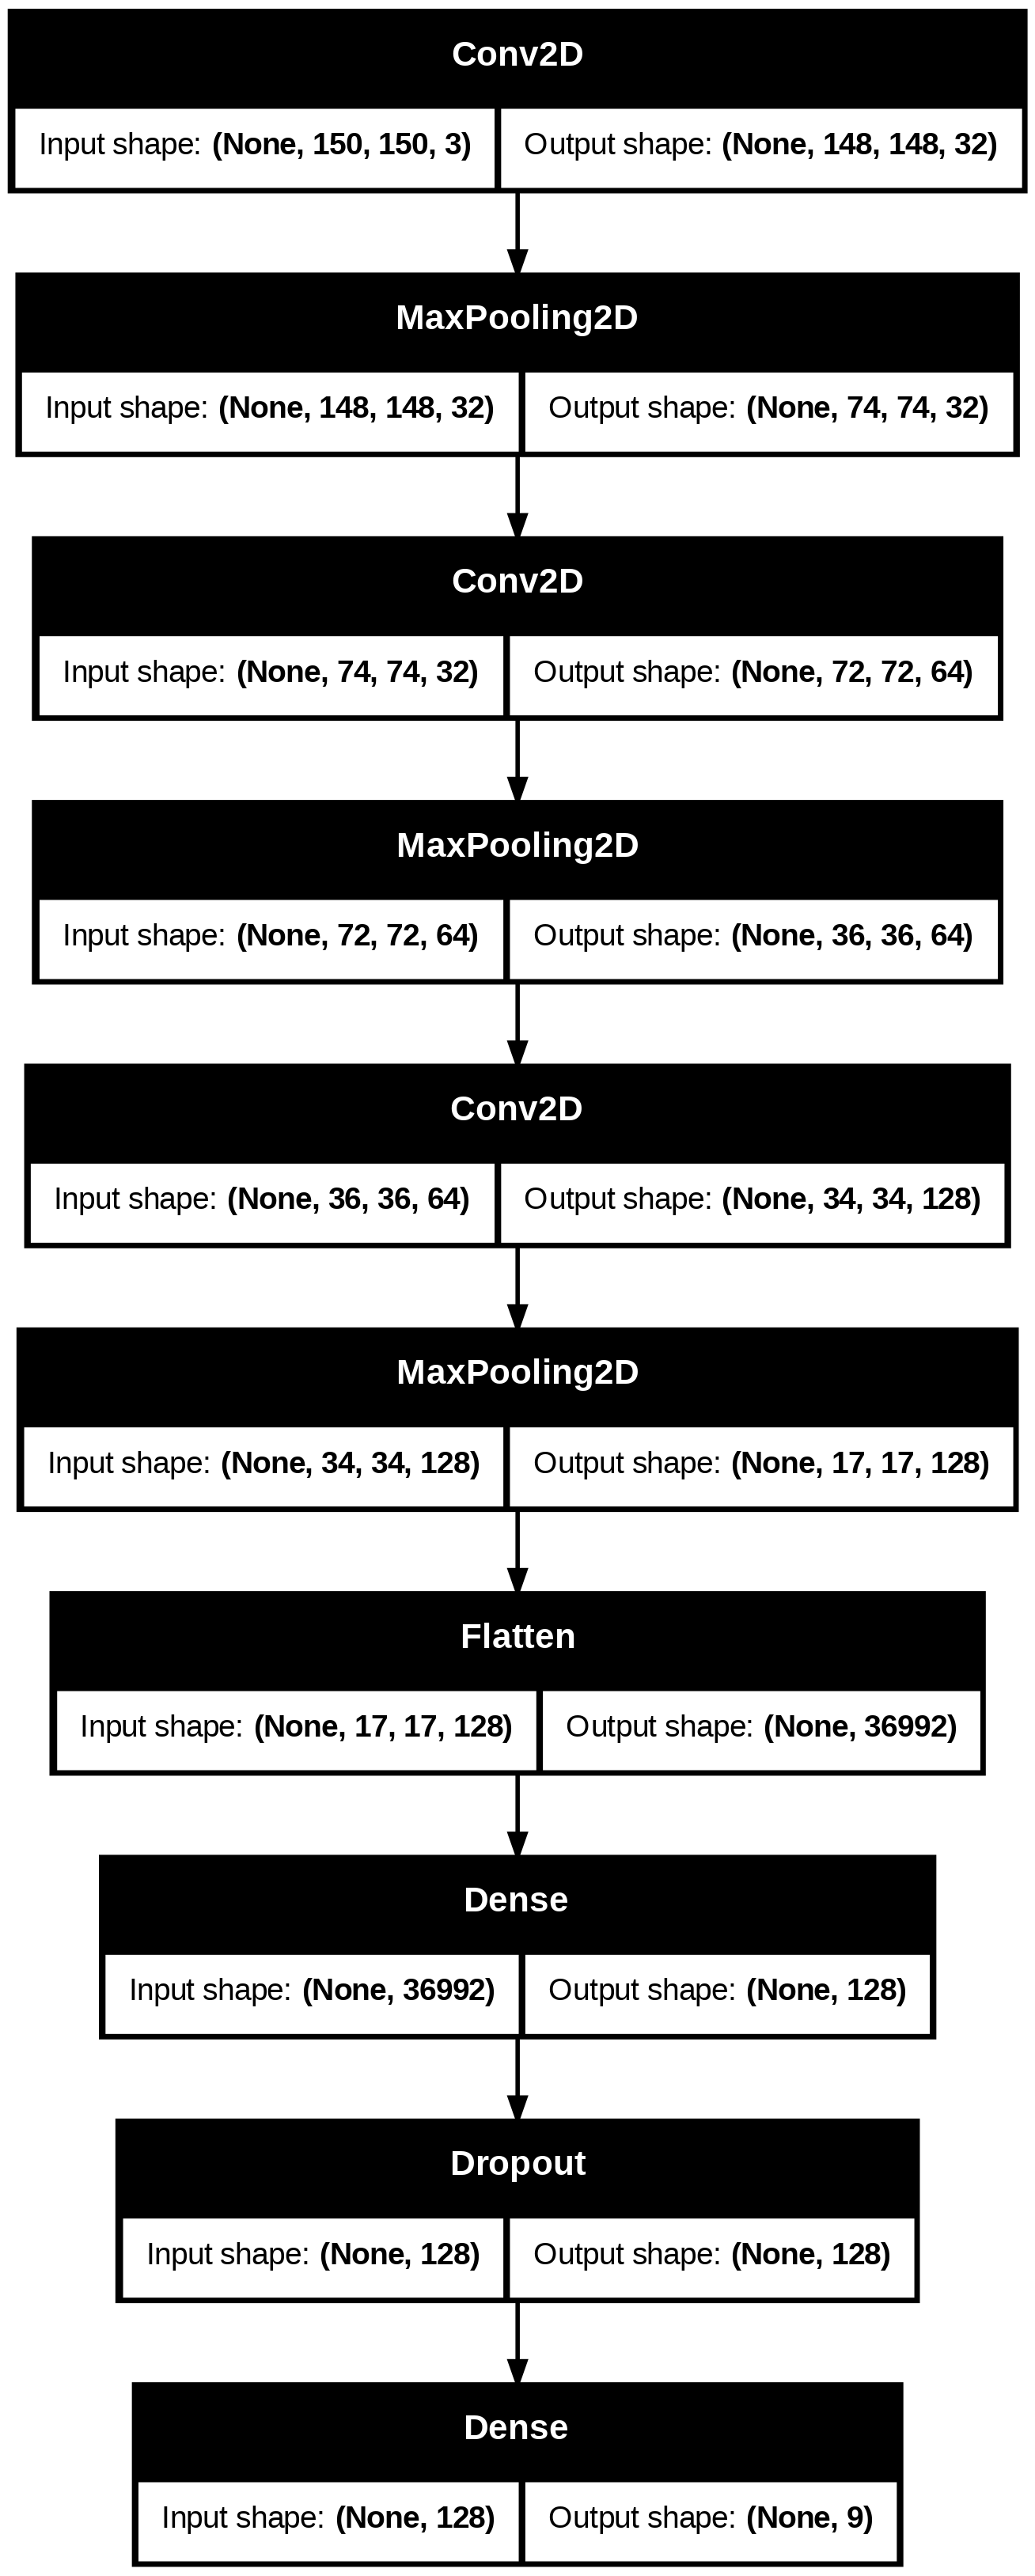

In [18]:
from IPython.display import Image
# Crear una visualización de la arquitectura
plot_model(model, to_file='model.png', show_shapes=True)  # Genera la imagen
display(Image('model.png'))  # Muestra la imagen generada

In [13]:
# Entrenar el modelo
epochs = 10
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset
)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.1217 - loss: 2.4297 - val_accuracy: 0.2083 - val_loss: 2.1758
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.2318 - loss: 2.1160 - val_accuracy: 0.2361 - val_loss: 1.8575
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2915 - loss: 1.8383 - val_accuracy: 0.3333 - val_loss: 1.6058
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3545 - loss: 1.6034 - val_accuracy: 0.3889 - val_loss: 1.5095
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4271 - loss: 1.4772 - val_accuracy: 0.4167 - val_loss: 1.6418
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.4952 - loss: 1.4184 - val_accuracy: 0.3889 - val_loss: 1.4553
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6617 - loss: 1.0524 - val_accuracy: 0.4583 - val_loss: 1.3980
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5879 - loss: 1.1330 - val_accuracy: 0.5000 - val_loss: 1.4391
Epoch 9/

In [14]:
# Evaluar el modelo en el conjunto de validación
test_loss, test_accuracy = model.evaluate(validation_dataset)
print(f"Precisión en el conjunto de validación: {test_accuracy:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.5395 - loss: 1.4844
Precisión en el conjunto de validación: 0.56


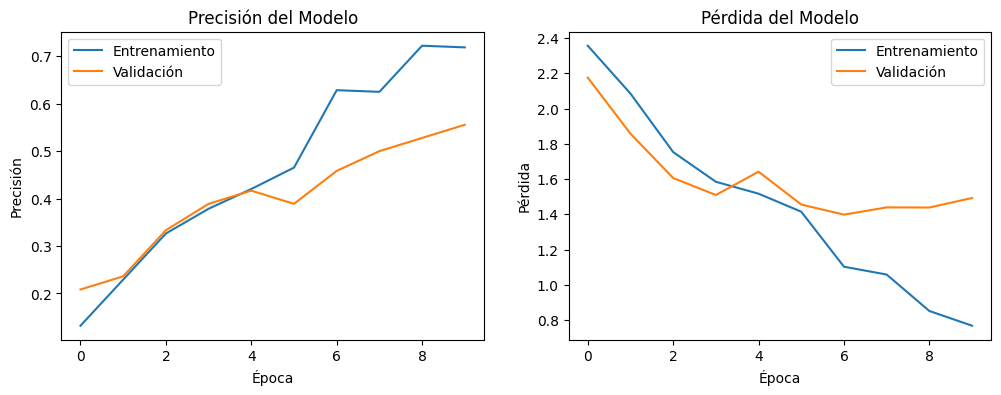

In [15]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión del Modelo')

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida del Modelo')

plt.show()